In [163]:
import pandas as pd
import numpy as np

#Corelation and plot graph
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [164]:
data_original=pd.read_csv(r'E:\Inueron\Project\default_credit_card\data\UCI_Credit_Card.csv')

In [165]:
data_original.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [166]:
data_original.tail(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [167]:
data_original.sort_values(by='LIMIT_BAL',ascending=False).head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
2197,2198,1000000.0,2,1,1,47,0,0,0,-1,...,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0
14919,14920,800000.0,1,2,1,53,-1,-1,-1,0,...,40814.0,12590.0,9339.0,11145.0,64657.0,131.0,247.0,9366.0,63482.0,0
18006,18007,800000.0,1,1,2,46,-2,-2,-2,-1,...,6193.0,1957.0,3175.0,4644.0,3832.0,6219.0,1961.0,3183.0,27201.0,0
24320,24321,780000.0,1,1,1,48,0,0,0,0,...,195124.0,184872.0,191090.0,10000.0,15004.0,10000.0,8000.0,10028.0,7003.0,0
28715,28716,780000.0,2,2,2,41,-2,-2,-2,-2,...,21482.0,72628.0,182792.0,62819.0,39558.0,22204.0,82097.0,184322.0,25695.0,0
21375,21376,760000.0,1,3,1,54,0,0,0,0,...,469931.0,474421.0,480598.0,20011.0,19500.0,19019.0,18003.0,20000.0,22000.0,0
13186,13187,750000.0,2,1,2,28,1,-1,-1,0,...,399493.0,400993.0,409483.0,250000.0,401003.0,7990.0,11000.0,417990.0,3080.0,0
3733,3734,750000.0,2,2,1,43,-1,-1,-1,-2,...,63749.0,85067.0,83208.0,99664.0,74640.0,63758.0,85072.0,83215.0,124063.0,0
10089,10090,750000.0,2,1,1,41,0,0,0,0,...,75696.0,35485.0,4889.0,6817.0,2330.0,2705.0,50854.0,4913.0,550.0,0
4603,4604,750000.0,2,3,1,40,-2,-2,-1,-1,...,38488.0,9777.0,66692.0,15420.0,3691.0,38679.0,9825.0,67024.0,76641.0,0


data_original have 30000 rows and 25 columns

In [168]:
data_original.shape

(30000, 25)

No Missing values present in the data_original

In [169]:
data_original.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [170]:
missing_values = data_original.isnull().sum()
missing_percentage = (missing_values / len(data_original)) * 100
print(f'missing_percentage :',missing_percentage)

missing_percentage : ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default.payment.next.month    0.0
dtype: float64


Interger columns 12 and Float columns 13

In [171]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [172]:
data_original=data_original.drop(labels=["ID"],axis=1)

We have 35 duplicates inside the data_originalset.Its very less as compare to our data_originalset so we can drop the duplicates

In [173]:
data_original.duplicated().sum()

35

In [174]:
df=data_original.drop_duplicates()

In [175]:
df.shape

(29965, 24)

In [176]:
#Segregate numerical and categorical columns
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']


We have only numerical values inside the data_original set

In [177]:
print('numerical_columns :',numerical_columns)
print('categorical_columns:',categorical_columns)

numerical_columns : Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')
categorical_columns: Index([], dtype='object')


In [178]:
df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','default.payment.next.month']].describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29965.0,167442.005006,129760.135222,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,29965.0,1.603738,0.489128,1.0,1.0,2.0,2.0,2.0
EDUCATION,29965.0,1.853629,0.790411,0.0,1.0,2.0,2.0,6.0
MARRIAGE,29965.0,1.551877,0.521997,0.0,1.0,2.0,2.0,3.0
AGE,29965.0,35.487969,9.219459,21.0,28.0,34.0,41.0,79.0
default.payment.next.month,29965.0,0.221258,0.415101,0.0,0.0,0.0,0.0,1.0


    Limit balance  - Average is 167442 
    Avergae Age of people is 35

In [179]:
df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe().T

,count,mean,std,min,25%,50%,75%,max
PAY_0,29965.0,-0.016753,1.123492,-2.0,-1.0,0.0,0.0,8.0
PAY_2,29965.0,-0.131854,1.196322,-2.0,-1.0,0.0,0.0,8.0
PAY_3,29965.0,-0.164392,1.195878,-2.0,-1.0,0.0,0.0,8.0
PAY_4,29965.0,-0.218922,1.168175,-2.0,-1.0,0.0,0.0,8.0
PAY_5,29965.0,-0.264509,1.132220,-2.0,-1.0,0.0,0.0,8.0
PAY_6,29965.0,-0.289438,1.149090,-2.0,-1.0,0.0,0.0,8.0


In [180]:
#Renaming name PAY_0 to PAY_1
df.rename(columns={'PAY_0':'PAY_0'}, inplace=True)
#Renaming name default.payment.next.month to default_payment
df.rename(columns={'default.payment.next.month':'default_payment'}, inplace=True)

C:\Users\KUMAR SANU\AppData\Local\Temp\ipykernel_19256\528106943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'PAY_0':'PAY_0'}, inplace=True)
C:\Users\KUMAR SANU\AppData\Local\Temp\ipykernel_19256\528106943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'default.payment.next.month':'default_payment'}, inplace=True)


In [181]:
df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe().T

,count,mean,std,min,25%,50%,75%,max
BILL_AMT1,29965.0,51283.009778,73658.132403,-165580.0,3595.0,22438.0,67260.0,964511.0
BILL_AMT2,29965.0,49236.366294,71195.567392,-69777.0,3010.0,21295.0,64109.0,983931.0
BILL_AMT3,29965.0,47067.916069,69371.352323,-157264.0,2711.0,20135.0,60201.0,1664089.0
BILL_AMT4,29965.0,43313.329885,64353.514373,-170000.0,2360.0,19081.0,54601.0,891586.0
BILL_AMT5,29965.0,40358.334390,60817.130623,-81334.0,1787.0,18130.0,50247.0,927171.0
BILL_AMT6,29965.0,38917.012281,59574.147742,-339603.0,1262.0,17124.0,49252.0,961664.0


Reasons for Credit Card Negative Balance
   1. Refunds have been made into your account: At times there are refunds made to your credit card account for reasons like return of a product.
   2. Excess amount has been paid by you: An overpayment from your end can result in a negative balance on your credit card account. The amount 3.paid in was in excess of the spending during the month, hence a negative balance came up.
   4. Cashback you have gotten: Cashbacks on purchase could have been credited into your card account

In [182]:
df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe().T


,count,mean,std,min,25%,50%,75%,max
PAY_AMT1,29965.0,5670.099316,16571.849467,0.0,1000.0,2102.0,5008.0,873552.0
PAY_AMT2,29965.0,5927.983180,23053.456645,0.0,850.0,2010.0,5000.0,1684259.0
PAY_AMT3,29965.0,5231.688837,17616.361124,0.0,390.0,1804.0,4512.0,896040.0
PAY_AMT4,29965.0,4831.617454,15674.464538,0.0,300.0,1500.0,4016.0,621000.0
PAY_AMT5,29965.0,4804.897047,15286.372298,0.0,261.0,1500.0,4042.0,426529.0
PAY_AMT6,29965.0,5221.498014,17786.976864,0.0,131.0,1500.0,4000.0,528666.0


Correlation

<Axes: >

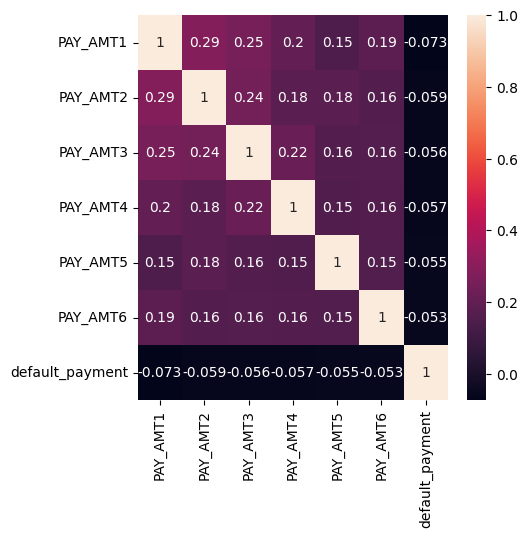

In [183]:
pay_amt=df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default_payment']]

#specify size of heatmap

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(pay_amt.corr(),annot=True)



<Axes: >

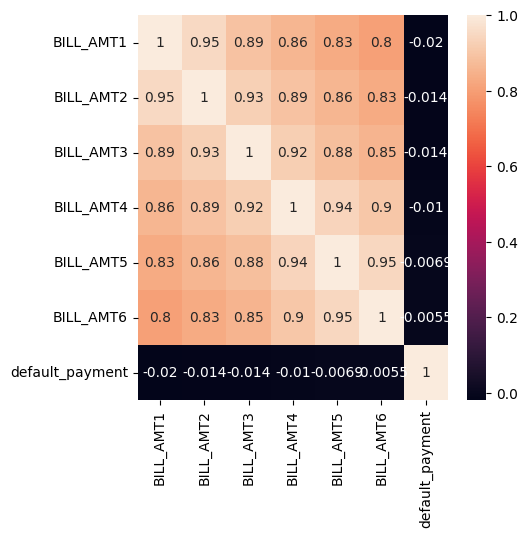

In [184]:
bill_amt=df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','default_payment']]
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(bill_amt.corr(),annot=True)

Currently we will not drop any correlated attributes.We will try to train our model on sane see what is the result we are getting and on the basis of accuray ll try to remove the corelated attributes

Highly Co-Related Attributes

    BILL_AMT1 =BILL_AMT2
    BILL_AMT2=BILL_AMT3
    BILL_AMT3=BILL_AMT4
    BILL_AMT4=BILL_AMT5
    BILL_AMT5=BILL_AMT6
    BILL_AMT6=BILL_AMT4



In [185]:
df['SEX'].value_counts()

SEX
2    18091
1    11874
Name: count, dtype: int64

Denotes

    1-Female 
    2-Male
    Ratio of Male is higer as per the Female

In [186]:

mask_fil=(df['EDUCATION']==5) | (df['EDUCATION']==6) | (df['EDUCATION']==0)
df.loc[mask_fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

EDUCATION
2    14019
1    10563
3     4915
4      468
Name: count, dtype: int64

1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
        
        ratio of university is higher as compare to other attributes

In [187]:
data_original.loc[data_original['MARRIAGE']==0, 'MARRIAGE'] = 3
data_original['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

Marital status (1=married, 2=single, 3=others)

    Ratio of single is higher as compare to other attributes

Distribution of data_original each attributes

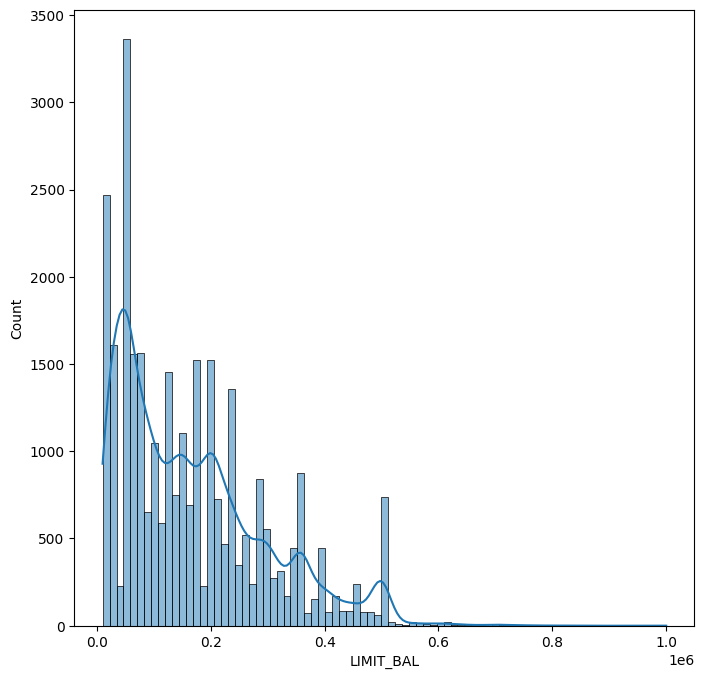

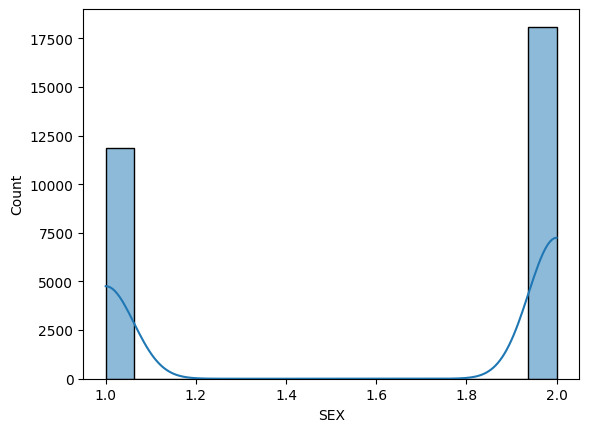

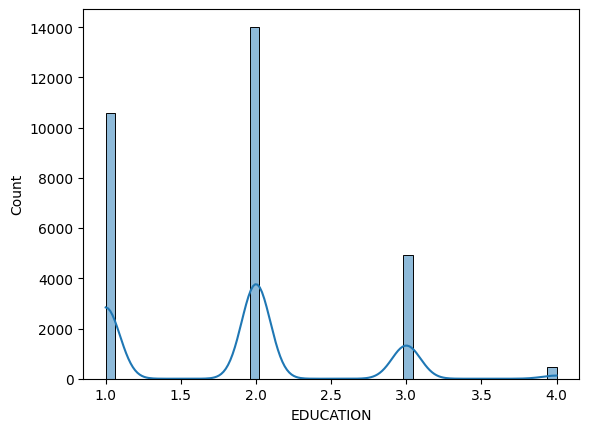

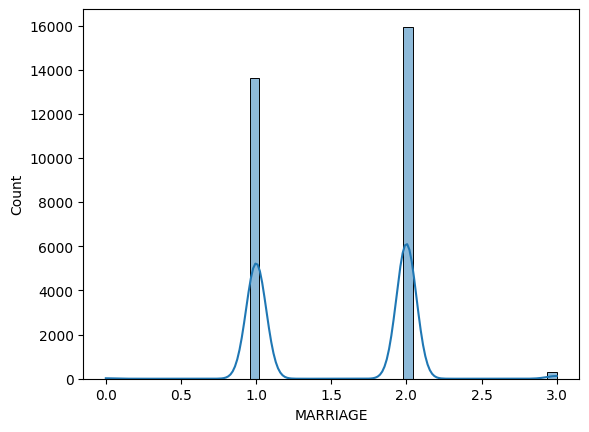

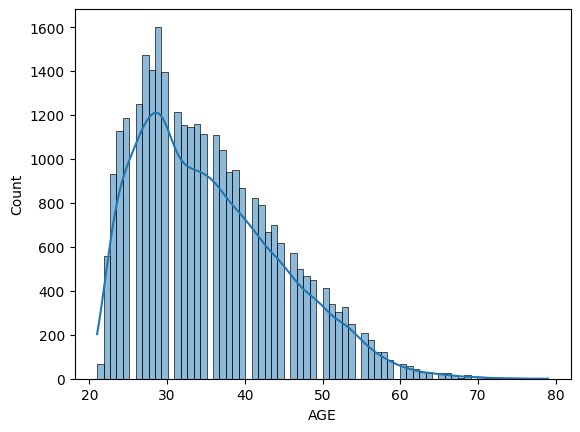

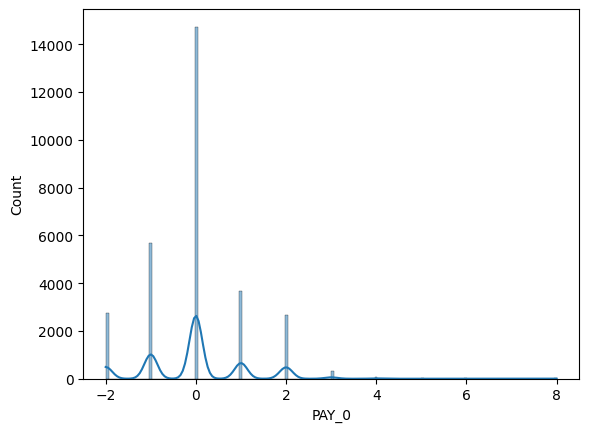

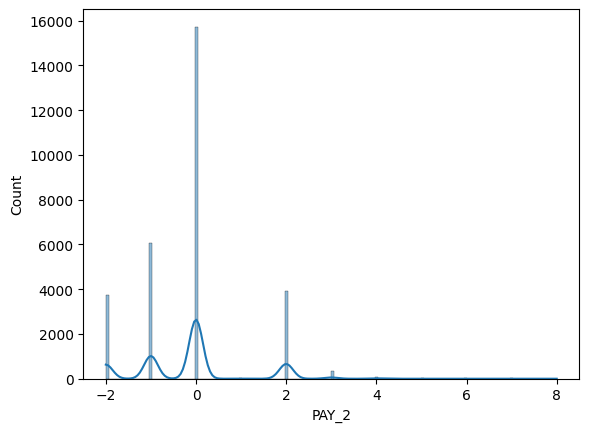

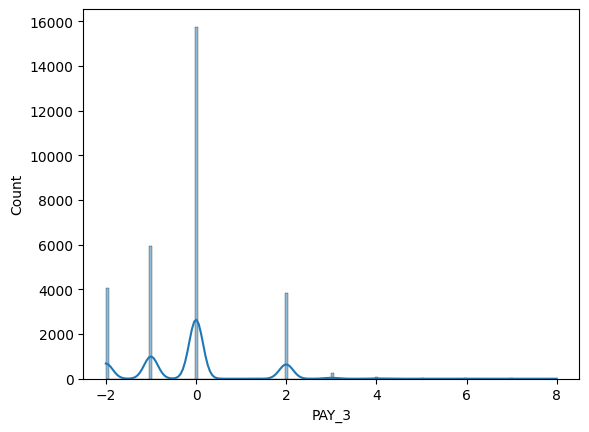

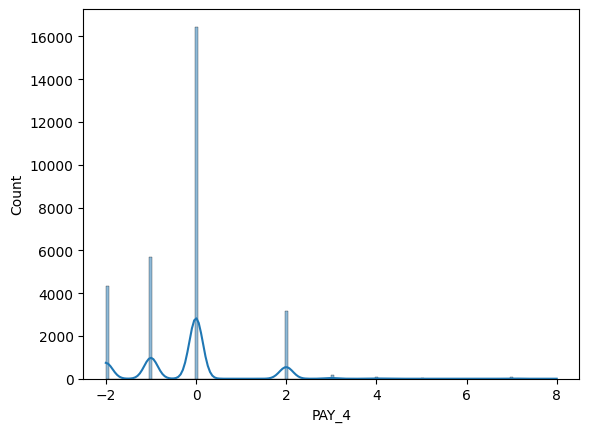

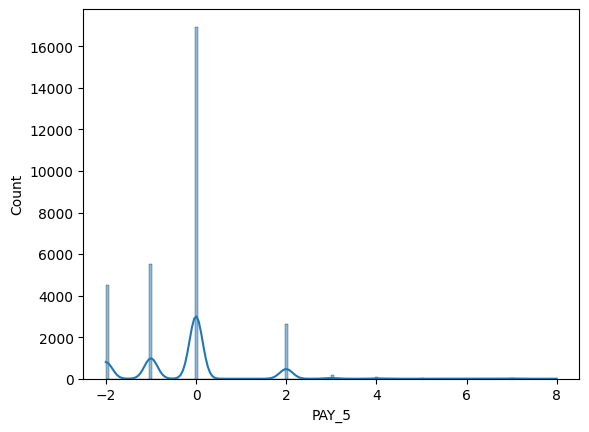

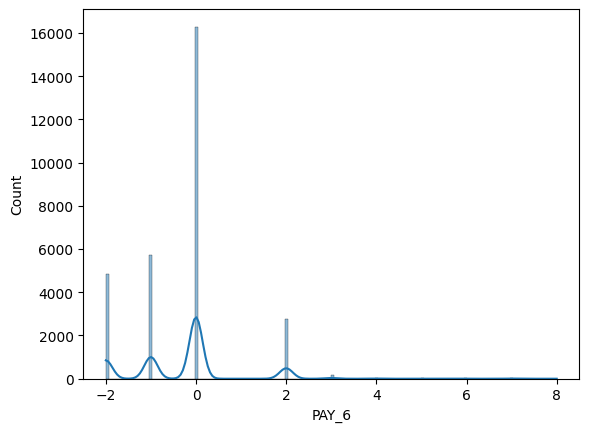

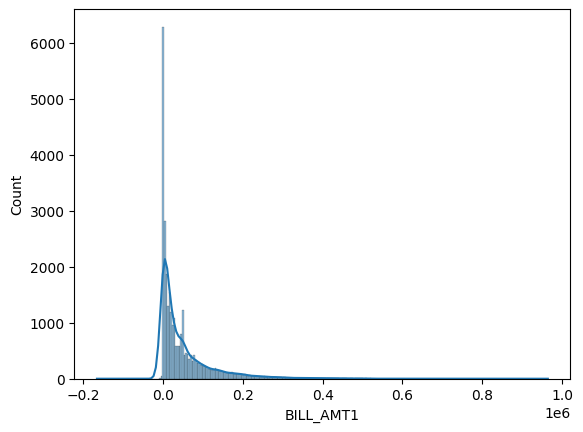

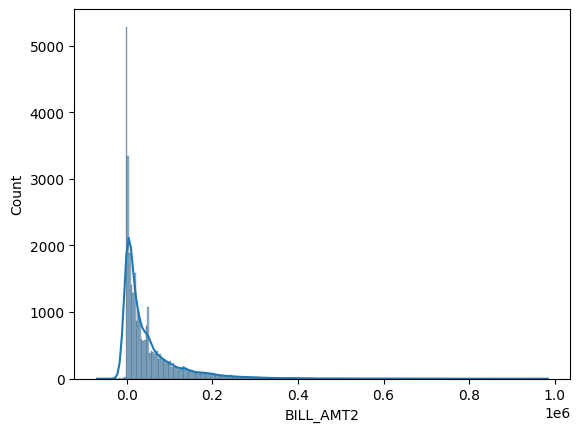

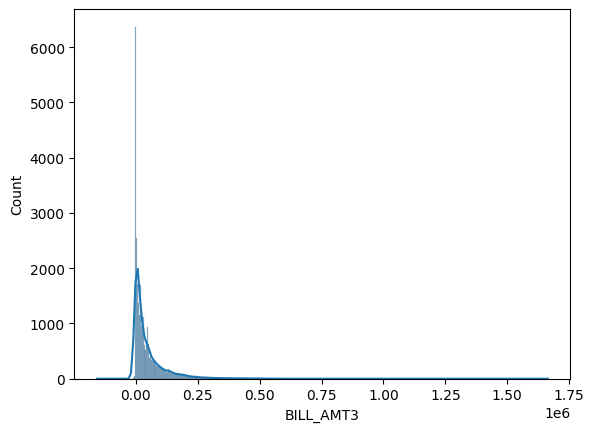

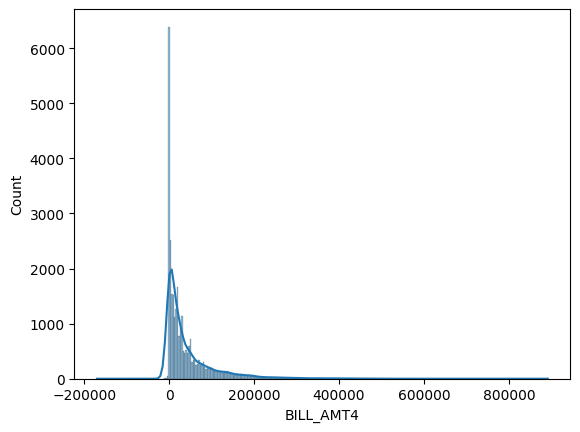

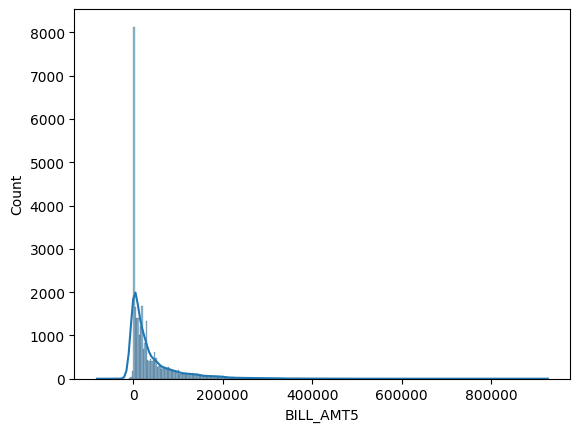

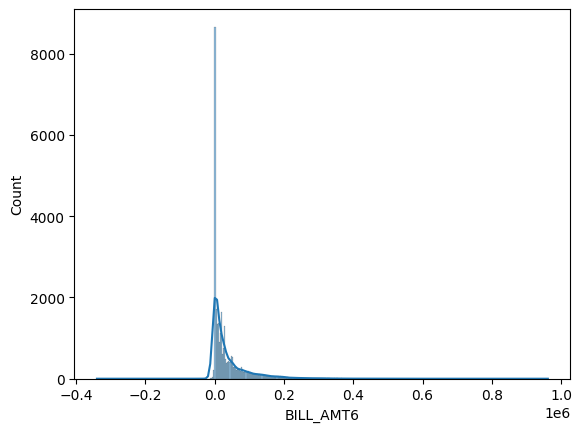

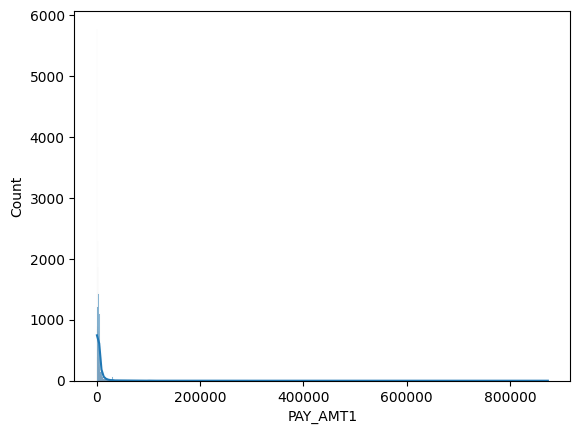

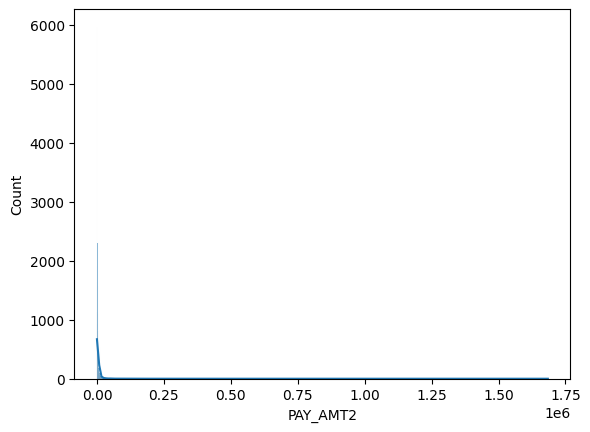

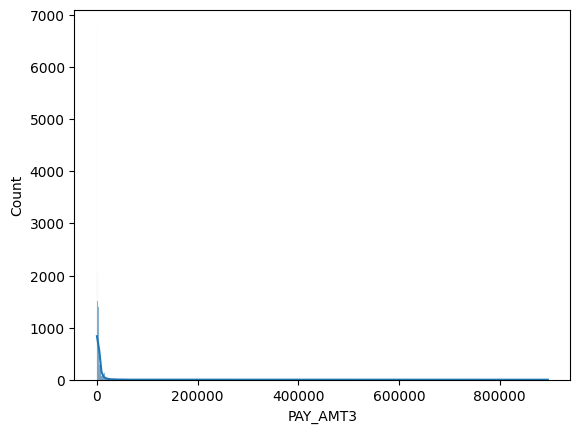

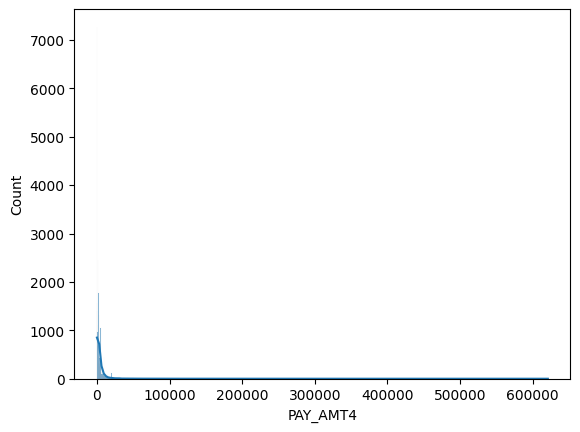

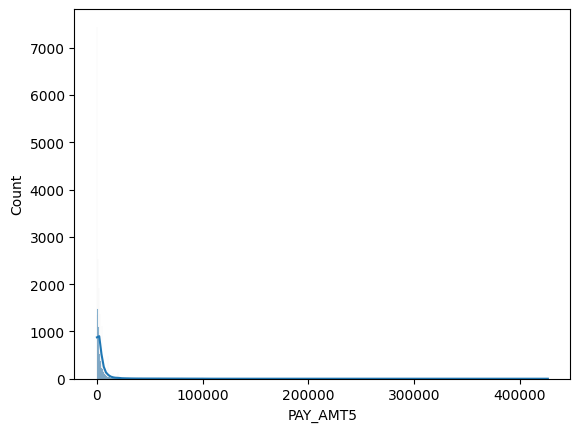

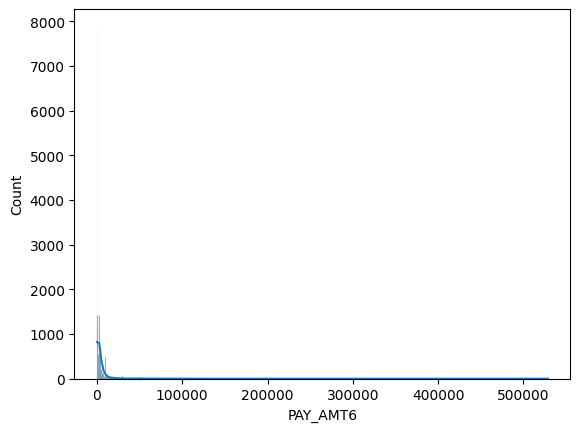

ValueError: Could not interpret value `default.payment.next.month` for parameter `x`

In [188]:
plt.figure(figsize=(8,8))
x=1
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<Axes: >

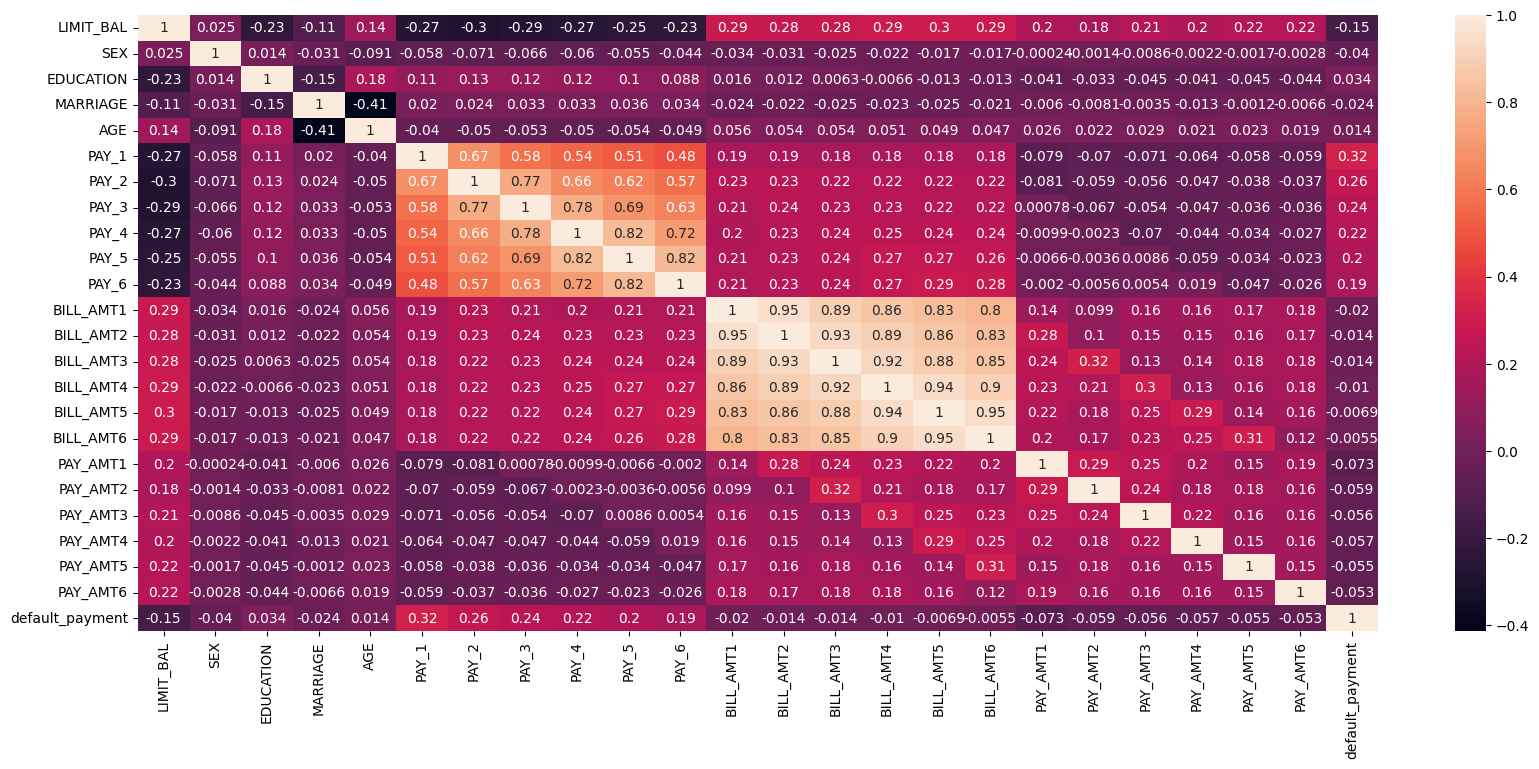

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='default_payment', ylabel='count'>

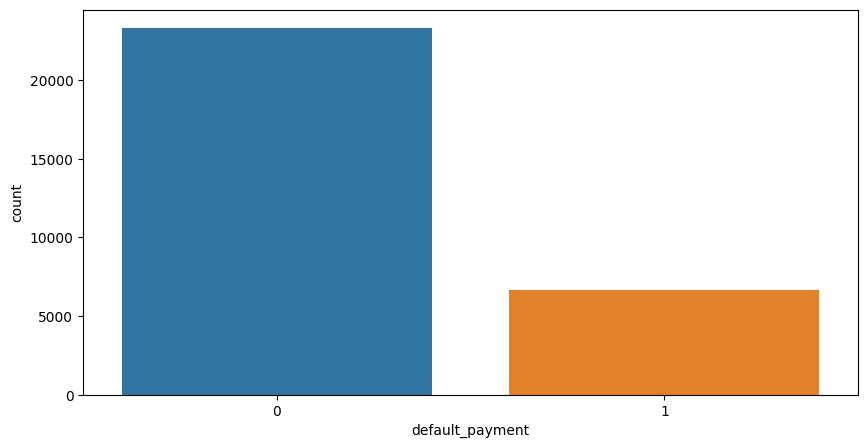

In [189]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'default_payment', data = df)

default.payment.next.month: Default payment (1=yes, 0=no)

    Observation: 
            defaulter is quit less and data_original is imbalance 

Independent Faeture:

    we will try to understand the categorical feature and nurical feature 

In [ ]:
df['SEX'].value_counts()

SEX
2    18091
1    11874
Name: count, dtype: int64

In [ ]:
df['EDUCATION'].value_counts()

EDUCATION
2    14019
1    10563
3     4915
4      468
Name: count, dtype: int64

In [190]:
#renaming columns

df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

C:\Users\KUMAR SANU\AppData\Local\Temp\ipykernel_19256\1214006197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
C:\Users\KUMAR SANU\AppData\Local\Temp\ipykernel_19256\1214006197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
C:\Users\KUMAR SANU\AppData\Local\Temp\ipykerne

In [191]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [193]:
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['default_payment']

C:\Users\KUMAR SANU\AppData\Local\Temp\ipykernel_19256\1578813653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Defaulter'] = df['default_payment']


In [194]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

C:\Users\KUMAR SANU\AppData\Local\Temp\ipykernel_19256\1313799402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)


ValueError: Could not interpret input 'SEX'

<Figure size 500x500 with 0 Axes>

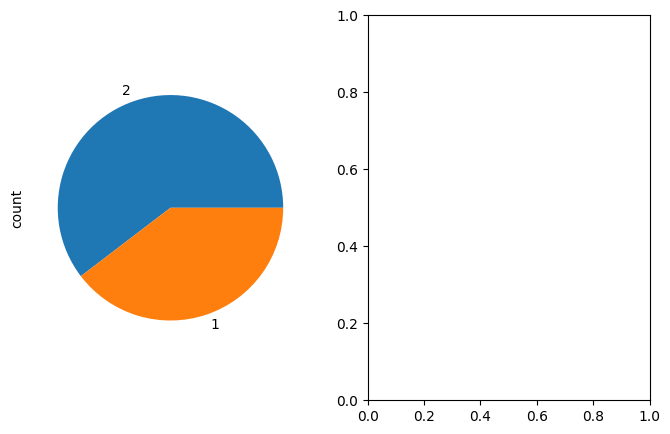

In [195]:
for col in categorical_features:
  plt.figure(figsize=(5,5))
  fig, axes = plt.subplots(ncols=2,figsize=(8,5))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data_original = df_cat)

Observation:

    * As compare to male,Feamle defaulter is high
    * Number of defaulter is hiher who has did university because criteria to get credit card will depend on the job, salary and source of income.
    * Higher proportion of defaulter is who is single as per the data_original.

<Axes: xlabel='default_payment', ylabel='LIMIT_BAL'>

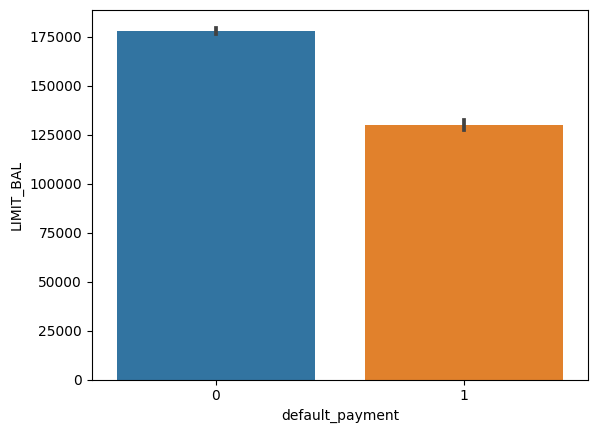

In [198]:
sns.barplot(x='default_payment', y='LIMIT_BAL', data=df)

<Axes: xlabel='default_payment', ylabel='AGE'>

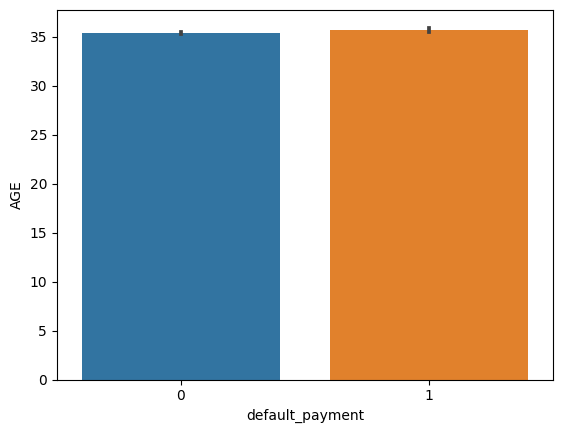

In [199]:
sns.barplot(x='default_payment', y='AGE', data=df)

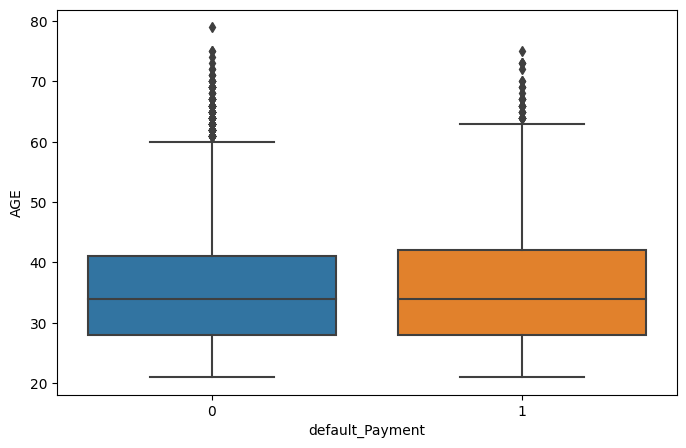

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.boxplot(x="default_payment", y="AGE", data_original=df)

In [200]:
bill_amnt_df = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

e:\Inueron\Project\default_credit_card\default_credit_code\env\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
e:\Inueron\Project\default_credit_card\default_credit_code\env\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
e:\Inueron\Project\default_credit_card\default_credit_code\env\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
e:\Inueron\Project\default_credit_card\default_credit_code\env\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
e:\Inueron\Project\default_credit_card\default_credit_code\env\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palett

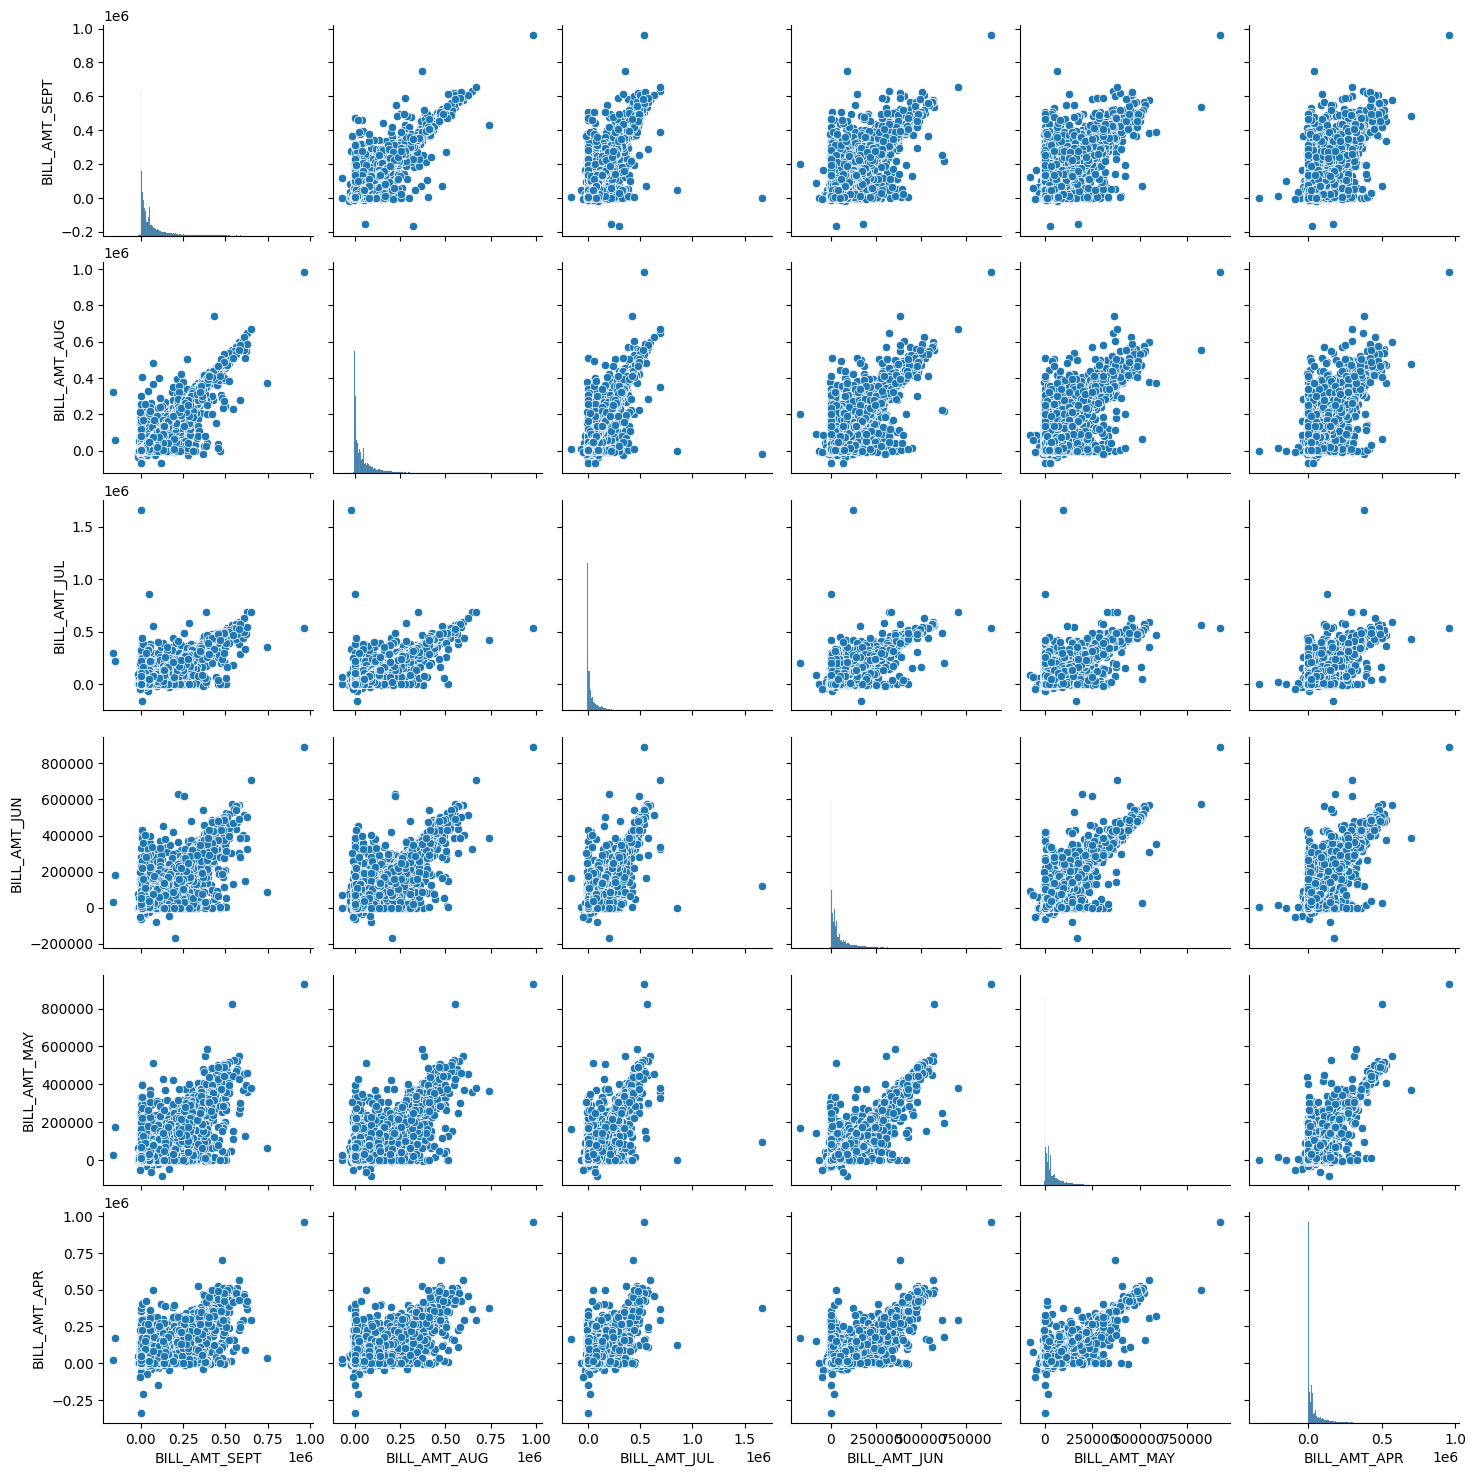

In [201]:
sns.pairplot(data = bill_amnt_df,palette='husl',markers=['o','s'])

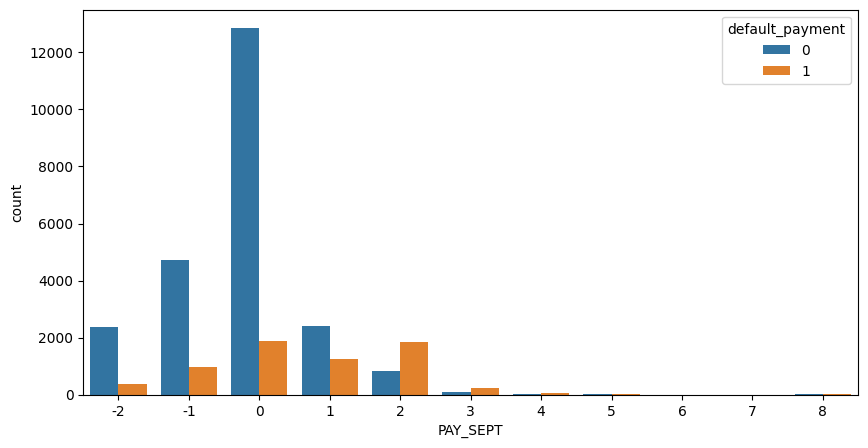

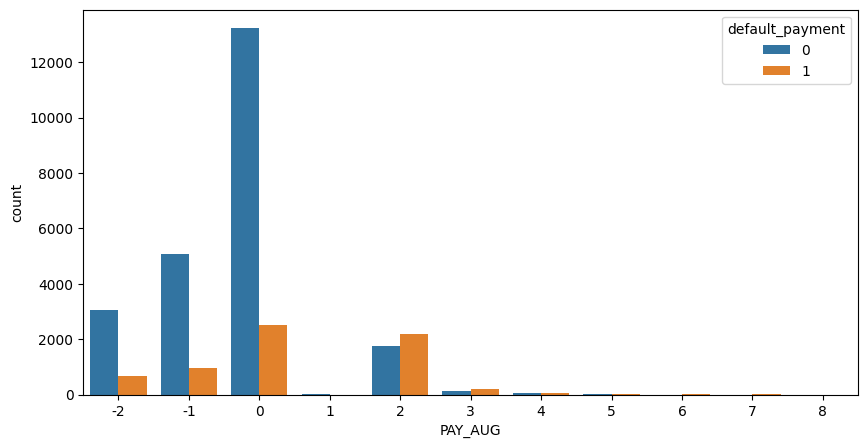

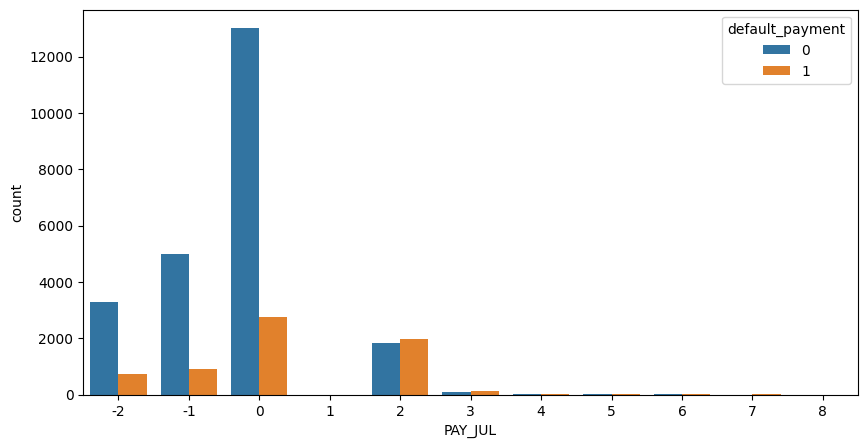

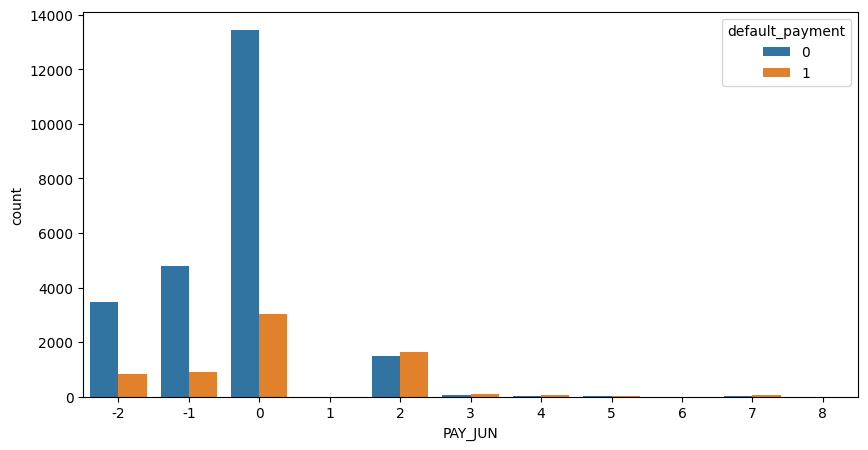

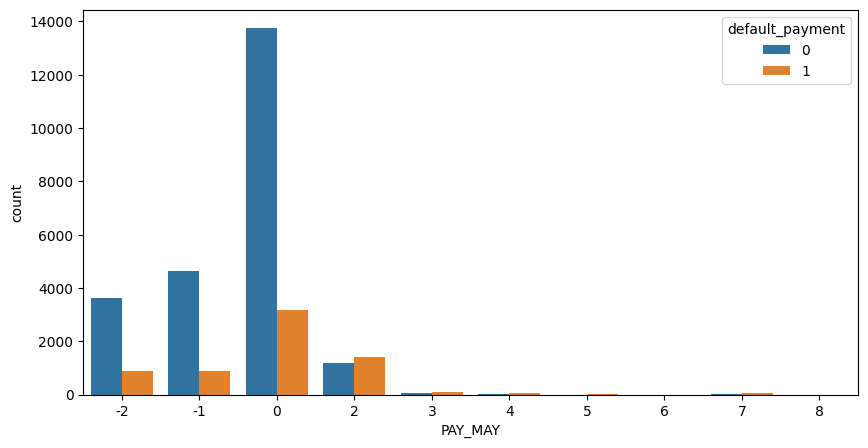

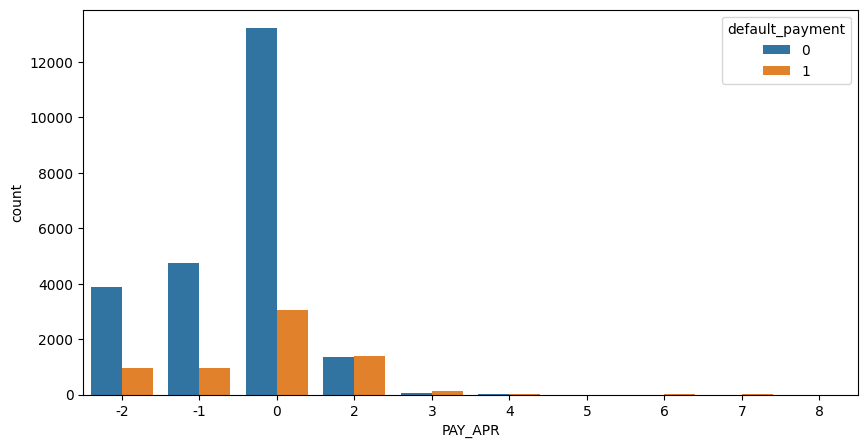

In [203]:
pay_col = ['PAY_SEPT','PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default_payment', data = df)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_Payment
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Feature enginering

In [205]:
fraud=df[df['default_payment']==1]
non_fraud=df[df['default_payment']==0]
print(f'Fraud :{fraud.shape}   Non Fraud :{non_fraud.shape}')

Fraud :(6630, 24)   Non Fraud :(23335, 24)


data_original is highly Imbalance Fraud rate is less as compare to Non Fraud

    we will balance the data_original with different technique and then see the performnce of model 

In [207]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['default_payment'])

print('Original data_originalset shape', len(df))
print('Resampled data_shape', len(y_smote))

Original data_originalset shape 29965
Resampled data_shape 46670


In [208]:
y_smote.shape

(46670,)

In [210]:
columns = list(df.columns)


In [211]:
columns.pop()

'default_payment'

In [212]:


balance_df = pd.DataFrame(x_smote, columns=columns)


In [213]:
balance_df['default_payment'] = y_smote

In [215]:
sns.countplot('default_payment', data = balance_df)

TypeError: countplot() got multiple values for argument 'data'

# Tree-based feature selection

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
from sklearn.preprocessing import SimpleImputer

Independent and Dependent Variable

In [ ]:
X=df.drop(labels=['default_payment'],axis=1)
y=df[['default_payment']]

In [ ]:
Y.value_counts()

default_Payment
0                  23335
1                   6630
Name: count, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
coefficients = model.coef_
intercept = model.intercept_

In [ ]:
intercept

array([0.31384376])

    As per the observation data_original is Imbalance